<a href="https://colab.research.google.com/github/ghhyc/Project-4/blob/main/Heart2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Heart Attack prediction using Machine Learning.**

##Features listed below.

  1. age - years
  2. sex (0-female, 1-male)
  3. cp -chest pain (0-asymptomatic, 1=typical angina, 2=atypical angina, 3=non-agina pain.
  4. trtbps- resting blood pressure upon arrival to hospital (Hg/mm)
  5. chol - cholestorol (mg/dl)
  6. fbs - fasting blood sugar > 120 mg/dL (0=false, 1=true)
  7. restecg - resting electro-cardiagram results (0=normal, 1=hyperthrophy, 2=having ST-T abnormal)
  8. thalach - max. heart rate 
  9. exng - excercise induced angina (0=no, 1=yes)
  10. oldpeak - ST depression induced by excercise relative to resting
  11. slp - slope of peak ST (0=down, 1=flat, 2=up)
  12. caa - vessel count (0-4) colored by flouroscopy
  13. thall - thallium stress test (1=fixed defect, 2=reversable defect, 3=normal
  14. **ouput** - 0=chance of heart attack is low, 1= chance of heart attack is high.
  

In [1]:
!pip install catboost
!pip install scikit-learn
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

     |████████████████████████████████| 76.1 MB 42 kB/s 
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [2]:
!pip install pyspark

     |████████████████████████████████| 281.4 MB 34 kB/s 
     |████████████████████████████████| 198 kB 39.7 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=bdac4555cbc69493df12c625a0b3c04d5b0569ea10f7ac34dfac1e9e61b70491
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [3]:
# Spark SQL
!pip install pyspark[sql]

In [4]:
# pandas API on Spark
!pip install pyspark[pandas_on_spark] plotly  # to plot your data, you can install plotly together.

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform
from scipy.stats import loguniform
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, roc_auc_score, roc_curve, confusion_matrix
from catboost import CatBoostClassifier

In [18]:
heart = pd.read_csv("https://data-bootcamp-01.s3.us-west-1.amazonaws.com/heart_statlog_cleveland_hungary_final.csv", sep=",")
heart.describe()

,age,sex,chest_pain,resting_bp,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [19]:
heart.head()

,age,sex,chest_pain,resting_bp,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform
from scipy.stats import loguniform
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, roc_auc_score, roc_curve, confusion_matrix
from catboost import CatBoostClassifier

In [21]:
heart.sex.value_counts().to_frame()

# majority of paitents are males (2x)

,sex
1,909
0,281


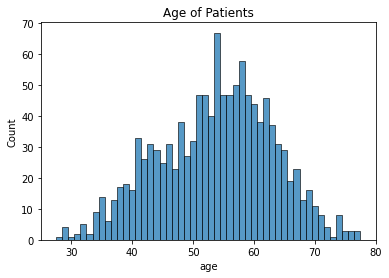

In [22]:
sns.histplot(heart.age, discrete=True)
plt.title("Age of Patients")
plt.show()

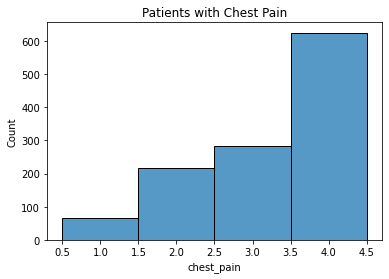

In [23]:
#patients with chest pain (cp)

sns.histplot(heart.chest_pain, discrete=True)
plt.title("Patients with Chest Pain")
plt.show()

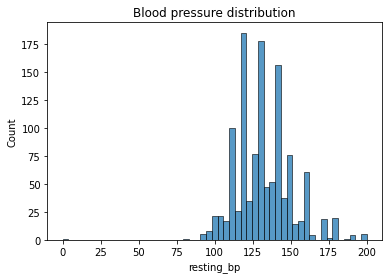

In [24]:
sns.histplot(heart.resting_bp)
plt.title('Blood pressure distribution')
plt.show()

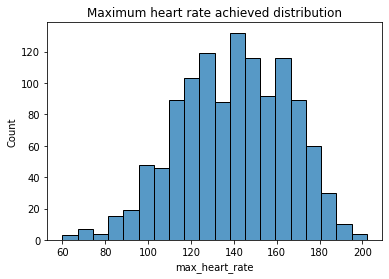

In [25]:
sns.histplot(heart.max_heart_rate)
plt.title('Maximum heart rate achieved distribution')
plt.show()

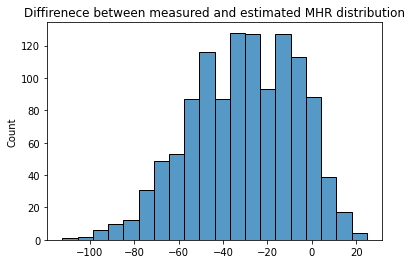

In [26]:
sns.histplot(heart.max_heart_rate - (208 - (0.7 * heart.age)))
plt.title('Diffirenece between measured and estimated MHR distribution')
plt.show()

In [28]:
rf_classifier = RandomForestClassifier(max_depth=8,
                                       n_estimators=100,
                                       random_state=42)
rf_classifier.fit(heart.drop('target', axis=1), df['target'])

NameError: ignored

In [ ]:
importance = pd.concat([pd.Series(df.columns[:-1]), 
                        pd.Series(rfc.feature_importances_)], axis=1)
importance.columns = ['feature', 'importance']
importance = importance.sort_values(by='importance', ascending=False)
importance